In this notebook, we want to show that YOLOv5 can easily be deployed with the Gradio library.

# Importing librairies and mounting google drive

In [ ]:
!pip install gradio

In [6]:
import gradio as gr
from PIL import Image
import torch

Hashes generated for all static assets.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P7/Weights/10_dog_breeds/

best.pt


# YOLOv5: Custom model (from YOLOv5x)

In [2]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P7/Weights/10_dog_breeds/best.pt')

# Confidence threshold
model.conf = 0.592

# NMS IoU threshold
model.iou = 0.50

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
Fusing layers... 
Model Summary: 476 layers, 87259255 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2021-5-19 torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)



# Inferences

image 1/1: 266x400 1 German_shepherd
Speed: 13.0ms pre-process, 32.4ms inference, 2.3ms NMS per image at shape (1, 3, 288, 416)


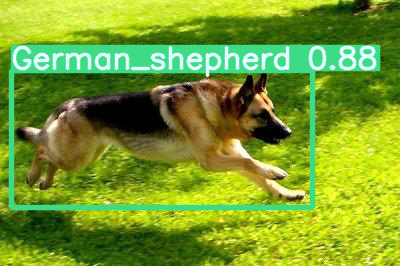

In [7]:
# Image
img = '/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/Data/images/test/German_shepherd/n02106662_13368.jpg'

# Inference
result = model(img, size=416)
result.print()

result.show()
Image.fromarray(result.imgs[0])

image 1/1: 256x384 2 African_hunting_dogs
Speed: 425.3ms pre-process, 32.0ms inference, 1.8ms NMS per image at shape (1, 3, 288, 416)


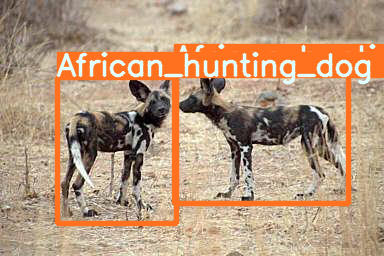

In [8]:
# Image
img = '/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/Data/images/test/African_hunting_dog/n02116738_308.jpg'

# Inference
result = model(img, size=416)
result.print()

result.show()
Image.fromarray(result.imgs[0])

# Application thanks to Gradio

In [9]:
def dog_detection(img):

  result = model(img, size=416)
  result.show()

  return Image.fromarray(result.imgs[0])

iface = gr.Interface(
    dog_detection,
    gr.inputs.Image(),
    "image"
)

iface.launch(
    # debug=True
)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)


Connected (version 2.0, client OpenSSH_7.6p1)
Authentication (publickey) successful!


Running on External URL: https://47424.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://47424.gradio.app')